In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
from skimage.color.colorconv import gray2rgb
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from sklearn.cluster import KMeans

In [3]:
items = os.listdir('/content/gdrive/MyDrive/Child_bellastoma/gomes/')
path= '/content/gdrive/MyDrive/Child_bellastoma/gomes/'

img_array = []

for each_image in items:
  if each_image.endswith(".jpg"):

    full_path = "/content/gdrive/MyDrive/Child_bellastoma/gomes/"+each_image
    image = cv2.imread(full_path)
    img_array.append(image)

In [4]:
ex=img_array[1]

In [5]:
image_ex = cv2.cvtColor(ex, cv2.COLOR_BGR2RGB)   #we are using opencv2 library
                                                 #conversion of bgr to rgb as by default its bgr in open cv
                                                 #after runnin this cell its rgb cell

In [6]:
image_ex.shape

(81, 104, 3)

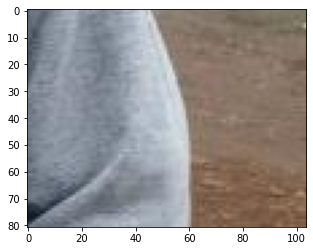

In [7]:
plt.imshow(image_ex)

KMEANS

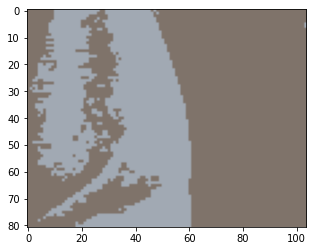

In [8]:
Image=image_ex
if(len(Image.shape)<3):
    x = Image.reshape(-1,1)
elif(len(Image.shape)==3):
    x = Image.reshape(-1,3)
    x = np.float32(x)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
    #Apply Kmeans
    ret,label,center=cv2.kmeans(x,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    #Now convert back the float32 data to uint8 and make the image
    center = np.uint8(center)
    res = center[label.flatten()]
    clustered_image = res.reshape((Image.shape))
plt.imshow(clustered_image)

In [9]:
image_ex_reshape = image_ex.reshape((image_ex.shape[0] * image_ex.shape[1], 3))  #reshaping by considering 
df_image_clustered = pd.DataFrame(list(zip(image_ex_reshape, label)),
              columns=['pixels','labels'])

## **ENTROPY**

In [14]:
df_image_clustered

,pixels,labels
0,"[89, 99, 111]",[1]
1,"[108, 118, 130]",[1]
2,"[107, 117, 129]",[1]
3,"[107, 117, 129]",[1]
4,"[106, 116, 128]",[1]
...,...,...
8419,"[135, 103, 80]",[1]
8420,"[128, 96, 73]",[1]
8421,"[127, 95, 72]",[1]
8422,"[126, 94, 71]",[1]


In [11]:
df_image_clustered_array = np.array(df_image_clustered)

In [12]:
df_image_clustered_array = df_image_clustered_array[0:,0]

In [13]:
df_image_clustered_array #taking it as numpy array for making operations easy

array([array([ 89,  99, 111], dtype=uint8),
       array([108, 118, 130], dtype=uint8),
       array([107, 117, 129], dtype=uint8), ...,
       array([127,  95,  72], dtype=uint8),
       array([126,  94,  71], dtype=uint8),
       array([124,  92,  69], dtype=uint8)], dtype=object)

In [15]:
df_image_clustered_1 = df_image_clustered[df_image_clustered['labels']==0]  #segregating as zero and one clusters
df_image_clustered_2 = df_image_clustered[df_image_clustered['labels']==1]

In [16]:
df_image_clustered_1.reset_index(inplace = True)

In [17]:
x = np.array(df_image_clustered_1['pixels'])
x.shape

(3063,)

In [18]:
df_image_clustered_frequency= np.empty([3063,3],dtype =int)

In [20]:
for i in range(len(df_image_clustered_frequency)):
  for j in range(3):
    df_image_clustered_frequency[i][j] = 0  #initializing a zero matrix

In [21]:
df_image_clustered_frequency

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [37]:
df_image_clustered_1.head()

,index,pixels,labels
0,10,"[132, 142, 154]",[0]
1,11,"[132, 142, 154]",[0]
2,12,"[140, 150, 162]",[0]
3,13,"[154, 164, 176]",[0]
4,14,"[163, 173, 185]",[0]


In [22]:
from collections import OrderedDict
dict_ord = OrderedDict()  # we use ordered dictionary to maintain the order of pixels or else each time we run the cell the order of pixel changes


In [23]:
#key,value 
for j in range (0,len(df_image_clustered_1)):
  for i in df_image_clustered_1['pixels'][j]:
    if i not in dict_ord.keys():
      dict_ord[i]=1
    else:
      dict_ord[i]+=1   #creating a dictionary to store the pixel and its respective count from which we can find the probablity of each pixel

In [24]:
Pixel_values = list(dict_ord.keys()) #stor

In [26]:
Pixel_frequency = list(dict_ord.values())

In [27]:
len(Pixel_values),len(Pixel_frequency)

(104, 104)

In [35]:
print(Pixel_values) #from the dictionary we get the keys(pixels) and convert it to list

[132, 142, 154, 140, 150, 162, 164, 176, 163, 173, 185, 174, 186, 165, 175, 187, 170, 180, 192, 198, 147, 157, 169, 141, 151, 161, 137, 159, 148, 158, 139, 149, 131, 153, 143, 171, 183, 184, 196, 168, 178, 190, 167, 177, 189, 200, 194, 203, 212, 204, 211, 219, 195, 193, 213, 146, 138, 160, 179, 172, 134, 144, 156, 136, 135, 145, 133, 155, 166, 181, 188, 208, 202, 215, 223, 210, 221, 191, 130, 152, 197, 201, 209, 205, 199, 207, 218, 217, 222, 226, 182, 214, 227, 206, 216, 220, 224, 225, 229, 228, 232, 231, 230, 129]


In [34]:
print(Pixel_frequency) #from the dictionary we get the values(frequency) and convert it to list

[64, 149, 163, 164, 127, 153, 128, 93, 153, 102, 89, 85, 95, 105, 102, 90, 127, 103, 96, 91, 145, 168, 101, 169, 139, 162, 82, 128, 148, 148, 93, 124, 56, 162, 151, 87, 101, 94, 84, 97, 77, 94, 125, 71, 98, 70, 74, 76, 54, 87, 79, 33, 90, 75, 68, 126, 81, 152, 93, 98, 84, 133, 152, 74, 81, 139, 90, 164, 133, 78, 79, 90, 74, 52, 22, 70, 30, 84, 41, 161, 79, 85, 71, 83, 83, 78, 39, 40, 23, 16, 77, 54, 8, 73, 50, 19, 21, 6, 2, 5, 2, 1, 2, 2]


In [38]:
#using the list of pixel values and its frequencies find the probablity of each pixel

probab = []

for i in range(len(Pixel_values)):

    temp =round(Pixel_frequency[i]/len(df_image_clustered_1),4)

    probab.append(temp)

In [39]:
len(df_image_clustered_frequency)

3063

In [31]:
for i in range(0,len(df_image_clustered_1)):   #
  for j in range(0,3):

    for k in Pixel_values:

      temp = k

      if(temp == x[i][j]):

        df_image_clustered_frequency[i][j] = dict_ord[temp]

In [33]:
df_image_clustered_frequency

array([[ 64, 149, 163],
       [ 64, 149, 163],
       [164, 127, 153],
       ...,
       [ 91,  83,  76],
       [ 79,  94, 101],
       [153, 139, 145]])

In [42]:
length_of_image_1 = len(df_image_clustered_1['pixels'])*3
probablity_of_cluster_1 = df_image_clustered_frequency/length_of_image_1  #label 0 cluster probablities

In [43]:
probablity_of_cluster_1

array([[0.00696485, 0.01621504, 0.0177386 ],
       [0.00696485, 0.01621504, 0.0177386 ],
       [0.01784743, 0.01382087, 0.01665034],
       ...,
       [0.00990315, 0.00903254, 0.00827076],
       [0.00859724, 0.01022962, 0.0109914 ],
       [0.01665034, 0.01512678, 0.01577974]])

In [ ]:
#PROBABILITY
from math import log2

length_of_image_1 = len(df_image_clustered_1['pixels'])*3
length_of_image_2 = len(df_image_clustered_2['pixels'])*3

probablity_of_pixel_1 = [(pixel/length_of_image_1)  for pixel in df_image_clustered_1['pixels']]
probablity_of_pixel_2 = [(pixel/length_of_image_2)  for pixel in df_image_clustered_2['pixels']]


#Empty Arrays
entropy_1=np.empty([len(probablity_of_pixel_1),3])
for i in range(0,len(probablity_of_pixel_1)):
  for j in range(0,3):
    entropy_1[i][j]=0

entropy_2=np.empty([len(probablity_of_pixel_2),3])
for i in range(0,len(probablity_of_pixel_2)):
  for j in range(0,3):
    entropy_2[i][j]=0


#ENTROPY
for i in range(0,len(probablity_of_pixel_1)):
  for j in range(0,3):
    temp = probablity_of_pixel_1[i][j]
    if(temp>0):
      prob = -temp*log2(temp)
      entropy_1[i][j] = prob
  
for i in range(0,len(probablity_of_pixel_2)):
  for j in range(0,3):
    temp = probablity_of_pixel_2[i][j]
    if(temp>0):
      prob = -temp*log2(temp)
      entropy_2[i][j] = prob
  
df_image_entropy_1=pd.DataFrame(list(zip(df_image_clustered_1['pixels'], df_image_clustered_1['labels'],entropy_1)),
              columns=['pixels','labels','entropy'])
df_image_entropy_2=pd.DataFrame(list(zip(df_image_clustered_2['pixels'], df_image_clustered_2['labels'],entropy_2)),
              columns=['pixels','labels','entropy'])


In [ ]:
len(df_image_entropy_1)+len(df_image_entropy_2)

8424

In [ ]:
len(image_ex_reshape)

8424

## **SUBSPACE**

In [ ]:
r_ent=np.empty([len(df_image_entropy_1['entropy']),1])
g_ent=np.empty([len(df_image_entropy_1['entropy']),1])
b_ent=np.empty([len(df_image_entropy_1['entropy']),1])

x=df_image_entropy_1['entropy']
for i in range (0,len(df_image_entropy_1['entropy'])):
   r_ent[i]=x[i][0] #red
   g_ent[i]=x[i][1] #green
   b_ent[i]=x[i][2] #blue

r_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  r_labels[i]=0
g_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  g_labels[i]=0
b_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  b_labels[i]=0


for i in range(0,len(r_ent)):
 temp = r_ent[i][0]
 #print(temp)
 if (temp > median(r_ent)):
   r_labels[i] = 1
 else:
   r_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = g_ent[i][0]
 #print(temp)
 if (temp > median(g_ent)):
   g_labels[i] = 1
 else:
   g_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = b_ent[i][0]
 #print(temp)
 if (temp > median(b_ent)):
   b_labels[i] = 1
 else:
   b_labels[i]= 0

red_sub = pd.DataFrame(list(zip(r_ent,r_labels)),
              columns=['red','labels'])
green_sub = pd.DataFrame(list(zip(g_ent,g_labels)),
              columns=['green','labels'])
blue_sub = pd.DataFrame(list(zip(b_ent,b_labels)),
              columns=['blue','labels'])

df_image_entropy_1['r labels']=red_sub['labels']
df_image_entropy_1['g labels']=green_sub['labels']
df_image_entropy_1['b labels']=blue_sub['labels']

df_image_entropy_1['gray']=''

for i in range (0,len(df_image_entropy_1)):
 if (df_image_entropy_1['r labels'][i]== df_image_entropy_1['g labels'][i]== df_image_entropy_1['b labels'][i]):
   df_image_entropy_1['gray'][i]= df_image_entropy_1['g labels'][i]
 elif (df_image_entropy_1['r labels'][i]+ df_image_entropy_1['g labels'][i]+df_image_entropy_1['b labels'][i]==1):
   df_image_entropy_1['gray'][i]=0
 elif (df_image_entropy_1['r labels'][i]+ df_image_entropy_1['g labels'][i]+df_image_entropy_1['b labels'][i]==2):
    df_image_entropy_1['gray'][i]=1

df_image_entropy_1['gray']=df_image_entropy_1['gray'].astype(int)

In [ ]:
r_ent=np.empty([len(df_image_entropy_2['entropy']),1])
g_ent=np.empty([len(df_image_entropy_2['entropy']),1])
b_ent=np.empty([len(df_image_entropy_2['entropy']),1])

x=df_image_entropy_2['entropy']
for i in range (0,len(df_image_entropy_2['entropy'])):
   r_ent[i]=x[i][0] #red
   g_ent[i]=x[i][1] #green
   b_ent[i]=x[i][2] #blue

r_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  r_labels[i]=0
g_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  g_labels[i]=0
b_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  b_labels[i]=0


for i in range(0,len(r_ent)):
 temp = r_ent[i][0]
 #print(temp)
 if (temp > median(r_ent)):
   r_labels[i] = 1
 else:
   r_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = g_ent[i][0]
 #print(temp)
 if (temp > median(g_ent)):
   g_labels[i] = 1
 else:
   g_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = b_ent[i][0]
 #print(temp)
 if (temp > median(b_ent)):
   b_labels[i] = 1
 else:
   b_labels[i]= 0

red_sub = pd.DataFrame(list(zip(r_ent,r_labels)),
              columns=['red','labels'])
green_sub = pd.DataFrame(list(zip(g_ent,g_labels)),
              columns=['green','labels'])
blue_sub = pd.DataFrame(list(zip(b_ent,b_labels)),
              columns=['blue','labels'])

df_image_entropy_2['r labels']=red_sub['labels']
df_image_entropy_2['g labels']=green_sub['labels']
df_image_entropy_2['b labels']=blue_sub['labels']

df_image_entropy_2['gray']=''

for i in range (0,len(df_image_entropy_2)):
 if (df_image_entropy_2['r labels'][i]== df_image_entropy_2['g labels'][i]== df_image_entropy_2['b labels'][i]):
   df_image_entropy_2['gray'][i]= df_image_entropy_2['g labels'][i]
 elif (df_image_entropy_2['r labels'][i]+ df_image_entropy_2['g labels'][i]+df_image_entropy_2['b labels'][i]==1):
   df_image_entropy_2['gray'][i]=0
 elif (df_image_entropy_2['r labels'][i]+ df_image_entropy_2['g labels'][i]+df_image_entropy_2['b labels'][i]==2):
    df_image_entropy_2['gray'][i]=1

df_image_entropy_2['gray']=df_image_entropy_2['gray'].astype(int)

In [ ]:
median(green_sub.loc[green_sub['labels'] ==0,'green'])

array([0.19880145])

In [ ]:
np.count_nonzero(cluster_ex==0)+np.count_nonzero(cluster_ex==1)

4104

In [ ]:
plt.imshow(clustered_image)

In [ ]:
plt.imshow(cluster_ex)

In [ ]:
image_ex.shape

(81, 104, 3)

In [ ]:
image_ex

In [ ]:
df_image_entropy

,pixels,labels,entropy,r labels,g labels,b labels,gray
0,"[89, 99, 111]",[0],"[0.04148970208089592, 0.04520582837406051, 0.0...",0.0,0.0,1.0,0
1,"[108, 118, 130]",[0],"[0.048472488539364304, 0.05202334718599711, 0....",0.0,1.0,1.0,1
2,"[107, 117, 129]",[0],"[0.04811295572634734, 0.0516717932913851, 0.05...",0.0,0.0,1.0,0
3,"[107, 117, 129]",[0],"[0.04811295572634734, 0.0516717932913851, 0.05...",0.0,0.0,1.0,0
4,"[106, 116, 128]",[0],"[0.047752584554348325, 0.05131947269423135, 0....",0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
8419,"[188, 198, 207]",[1],"[0.11479893574064484, 0.11929420343711174, 0.1...",1.0,1.0,1.0,1
8420,"[187, 194, 202]",[1],"[0.11434488720044328, 0.11750584243832837, 0.1...",1.0,1.0,1.0,1
8421,"[198, 199, 203]",[1],"[0.11929420343711174, 0.11973930121052526, 0.1...",1.0,1.0,1.0,1
8422,"[188, 184, 183]",[1],"[0.11479893574064484, 0.1129776859410611, 0.11...",1.0,1.0,1.0,1


In [ ]:
df_image_entropy=pd.concat([df_image_entropy_1,df_image_entropy_2],ignore_index=True)

In [ ]:
cluster_ex=np.empty([81,104], dtype=int)
for j in range (0,81):
  for k in range (0,104):
    cluster_ex[j][k]=0

In [ ]:
for i in range(0,len(df_image_entropy)):
   for j in range (0,81):
     for k in range (0,104):
       temp= df_image_entropy['pixels'][i]
       if(np.array_equiv(image_ex[j][k],temp)==True):
          cluster_ex[j][k]=df_image_entropy['gray'][i]

In [ ]:
x=cluster_ex
for i in range (0,81):
  for j in range (0,104):
    if(x[i][j] ==0):
      x[i][j]=100
    if(x[i][j] ==1):
      x[i][j]=250

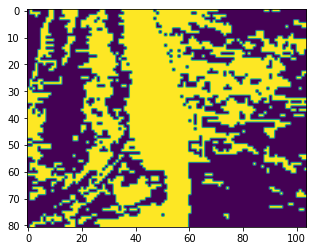

In [ ]:
plt.imshow(cluster_ex)

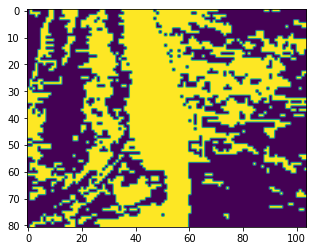

In [ ]:
plt.imshow(x)

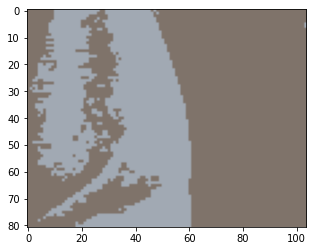

In [ ]:
plt.imshow(clustered_image)

In [ ]:
for i in range(0,len(df_image_entropy_2)):
   for j in range (0,81):
     for k in range (0,104):
       temp= df_image_entropy_2['pixels'][i]
       if(np.array_equiv(image_ex[j][k],temp)==True):
          cluster_ex[j][k]=df_image_entropy_2['gray'][i]

In [ ]:
r_labels=r_channel.labels_
g_labels=g_channel.labels_
b_labels=b_channel.labels_

In [ ]:
r_channel=KMeans(n_clusters=2, random_state=0).fit(r_ent)
g_channel=KMeans(n_clusters=2, random_state=0).fit(g_ent)
b_channel=KMeans(n_clusters=2, random_state=0).fit(b_ent)